In [ ]:
#참고
# https://www.tensorflow.org/tutorials/keras/regression?hl=ko
# https://www.kaggle.com/code/ktakuma/boston-house-prices-dnn-regression
# https://www.kaggle.com/code/systemvaz/house-prices-with-tensorflow-dnn

In [7]:
import numpy as np
import pandas as pd 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# seaborn 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf\

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab/houseprac2/prac2.csv')
print(df.shape)
df.head()

(3449783, 18)


,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,구분,위도,경도,대학최소거리,역최소거리,스타벅스 개수,마트 개수,한국은행기준금리,종가,년도,건물나이
0,0,9,0,77.75,33000,0,2.0,0,37.481454,127.053099,3.394074,0.833371,2.0,3.0,2.5,1941.15,2014.0,26.0
1,0,9,0,79.97,34000,0,2.0,0,37.476283,127.056841,3.901717,1.489581,2.0,3.0,2.5,1941.15,2014.0,27.0
2,0,9,0,79.97,28000,0,1.0,0,37.476283,127.056841,3.901717,1.489581,2.0,3.0,2.5,1941.15,2014.0,27.0
3,0,9,0,79.97,35000,0,2.0,0,37.476283,127.056841,3.901717,1.489581,2.0,3.0,2.5,1941.15,2014.0,27.0
4,0,9,1,104.43,40000,40,8.0,0,37.483973,127.056014,3.576921,0.796235,2.0,3.0,2.5,1941.15,2014.0,30.0


In [9]:
df['환산_보증금_월세'] = df.apply(lambda x: x['보증금(만원)'] + x['월세(만원)']*12*20, axis='columns')
df = df.drop(['보증금(만원)','월세(만원)'], axis=1)
df.head()

,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),층,구분,위도,경도,대학최소거리,역최소거리,스타벅스 개수,마트 개수,한국은행기준금리,종가,년도,건물나이,환산_보증금_월세
0,0,9,0,77.75,2.0,0,37.481454,127.053099,3.394074,0.833371,2.0,3.0,2.5,1941.15,2014.0,26.0,33000.0
1,0,9,0,79.97,2.0,0,37.476283,127.056841,3.901717,1.489581,2.0,3.0,2.5,1941.15,2014.0,27.0,34000.0
2,0,9,0,79.97,1.0,0,37.476283,127.056841,3.901717,1.489581,2.0,3.0,2.5,1941.15,2014.0,27.0,28000.0
3,0,9,0,79.97,2.0,0,37.476283,127.056841,3.901717,1.489581,2.0,3.0,2.5,1941.15,2014.0,27.0,35000.0
4,0,9,1,104.43,8.0,0,37.483973,127.056014,3.576921,0.796235,2.0,3.0,2.5,1941.15,2014.0,30.0,49600.0


<Axes: >

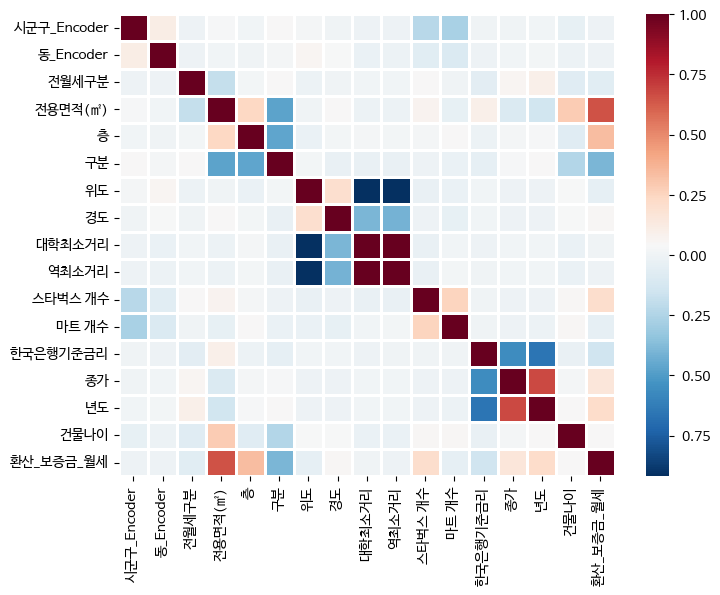

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Show correlation matrix
corr = df.corr()

# Show headmap
plt.figure(figsize=(8,6))
plt.rc('font', family='NanumBarunGothic')  #한글깨짐방지
sns.heatmap(corr,cmap='RdBu_r',linewidth=1)

In [ ]:
# train_dataset = df.sample(frac=0.8,random_state=0)
# test_dataset = df.drop(train_dataset.index)

In [ ]:
# train_dataset.head()

In [ ]:
# test_dataset.head()

In [10]:
X = df.drop('환산_보증금_월세', axis=1)
y = df['환산_보증금_월세']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_train

,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),층,구분,위도,경도,대학최소거리,역최소거리,스타벅스 개수,마트 개수,한국은행기준금리,종가,년도,건물나이
2720780,16,139,1,59.6500,11.0,0,37.585587,127.016621,0.613165,0.245054,0.0,0.0,1.75,2096.86,2018.0,15.0
1326631,3,380,0,28.9700,3.0,2,37.534848,126.840747,1.746990,0.624695,7.0,4.0,1.25,2663.34,2022.0,3.0
2496561,0,74,1,84.9984,17.0,0,37.493541,127.050547,3.050367,0.527394,4.0,2.0,1.50,2063.05,2019.0,13.0
1707711,14,176,0,33.0100,6.0,2,37.483209,127.003217,0.645515,0.529819,25.0,2.0,0.50,3296.68,2021.0,4.0
2363129,19,235,1,99.9700,3.0,1,37.517548,126.932337,2.606839,0.837195,25.0,6.0,0.75,1947.56,2020.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369921,11,391,1,59.5110,6.0,0,37.500395,126.958696,0.477686,0.640191,1.0,1.0,3.00,2106.70,2011.0,8.0
2519212,0,161,0,84.8700,9.0,0,37.515991,127.046228,1.346510,0.461170,24.0,4.0,1.25,2083.48,2019.0,15.0
614165,17,354,1,71.1700,10.0,0,37.529386,127.118903,1.520778,0.174155,0.0,1.0,0.50,2326.17,2020.0,25.0
2271682,19,199,0,59.7800,4.0,0,37.506980,126.922614,3.039643,0.815902,1.0,7.0,3.25,2100.69,2011.0,6.0


In [11]:
y_train

2720780     32200.0
1326631     25600.0
2496561    100400.0
1707711     31500.0
2363129     58000.0
             ...   
369921      18800.0
2519212     92000.0
614165      33200.0
2271682     23000.0
166004      15600.0
Name: 환산_보증금_월세, Length: 2587337, dtype: float64

### 처음에 돌려봤던 모델 그대로
batch, normalize

In [15]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', ))
model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Set EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=500)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2176      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)              

In [ ]:
# example_batch = X_train[:10]
# example_result = model.predict(example_batch)
# example_result

In [18]:
# history = model.fit(X_train, y_train, epochs=50,
history = model.fit(X_train, y_train, epochs=20, #시간상 20번만 돌림
                    validation_split=0.2, batch_size=32, verbose=1) #verbose 1이어야 로그나옴 0이면 안나옴 멍청아

Epoch 1/20
64684/64684 [==============================] - 429s 7ms/step - loss: 172594304.0000 - mae: 8252.2285 - val_loss: 3866728152615478099968.0000 - val_mae: 112243904.0000
Epoch 2/20
64684/64684 [==============================] - 420s 6ms/step - loss: 164133664.0000 - mae: 8095.7578 - val_loss: 20097259293945309954048.0000 - val_mae: 218683872.0000
Epoch 3/20
64684/64684 [==============================] - 434s 7ms/step - loss: 157608160.0000 - mae: 7946.7114 - val_loss: 18491593873160262570213376.0000 - val_mae: 8423880192.0000
Epoch 4/20
64684/64684 [==============================] - 433s 7ms/step - loss: 147432112.0000 - mae: 7692.4375 - val_loss: 40070649277896412572418048.0000 - val_mae: 8991091712.0000
Epoch 5/20
64684/64684 [==============================] - 418s 6ms/step - loss: 141642384.0000 - mae: 7559.1162 - val_loss: 15373584533398312120745984.0000 - val_mae: 5457125376.0000
Epoch 6/20
64684/64684 [==============================] - 414s 6ms/step - loss: 138546160.0000

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
15,124873152.0,7188.027832,1.878371e+26,1.907354e+10,15
16,124543248.0,7173.538086,3.420049e+25,8.129954e+09,16
17,123395448.0,7158.332520,2.409227e+23,6.879576e+08,17
18,123654016.0,7149.920898,2.926411e+24,2.449083e+09,18
19,123112416.0,7147.525391,4.245740e+24,2.883474e+09,19


In [20]:
Y_test_hat = model.predict(X_test).ravel().astype(int)


26952/26952 [==============================] - 51s 2ms/step


In [21]:
hat_s = Y_test_hat[1000:1020]
s = y_test[1000:1020]

<Figure size 1000x600 with 0 Axes>

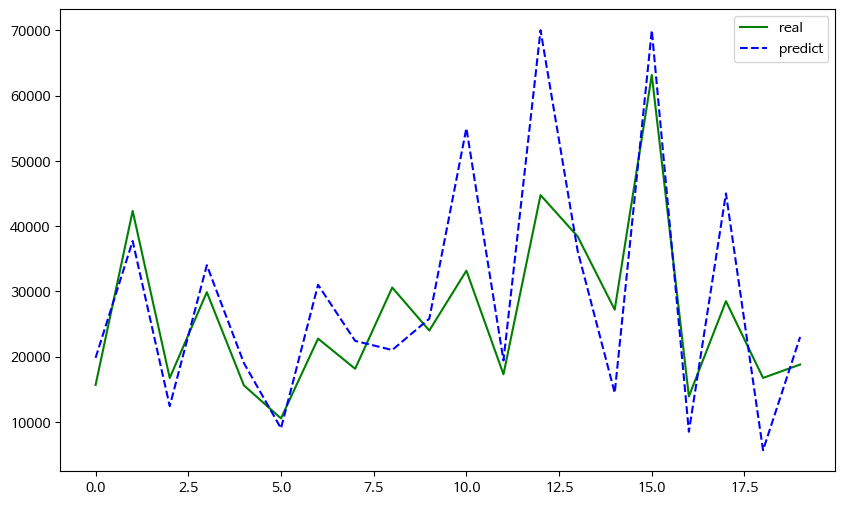

<Figure size 1000x600 with 0 Axes>

In [22]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(20), hat_s, '-',color = 'green', label='real')
plt.plot(np.arange(20), s, '--', color = 'blue', label='predict')
plt.legend()
plt.figure()

In [23]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

26952/26952 [==============================] - 75s 3ms/step - loss: 43067663751799898112.0000 - mae: 12024550.0000
loss:43067663751799898112.000
mae: 12024550.000


In [25]:
model.save('/content/drive/MyDrive/Colab/houseprac2/model1')

Dropout 포함


In [30]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', ))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Set EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=500)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               2176      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, epochs=10, #시간상 10번만 돌림
                    validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/10
64684/64684 [==============================] - 275s 4ms/step - loss: 333926272.0000 - mae: 11585.2129 - val_loss: 440716640.0000 - val_mae: 12250.4795
Epoch 2/10
64684/64684 [==============================] - 259s 4ms/step - loss: 316442880.0000 - mae: 11116.0879 - val_loss: 431500800.0000 - val_mae: 12076.6729
Epoch 3/10
64684/64684 [==============================] - 272s 4ms/step - loss: 317014144.0000 - mae: 11137.5430 - val_loss: 441251296.0000 - val_mae: 12114.7979
Epoch 4/10
64684/64684 [==============================] - 276s 4ms/step - loss: 314769600.0000 - mae: 11082.5898 - val_loss: 373439488.0000 - val_mae: 11305.5469
Epoch 5/10
64684/64684 [==============================] - 264s 4ms/step - loss: 312433888.0000 - mae: 11045.1963 - val_loss: 423146720.0000 - val_mae: 12050.7100
Epoch 6/10
64684/64684 [==============================] - 260s 4ms/step - loss: 311440672.0000 - mae: 11023.4961 - val_loss: 420231104.0000 - val_mae: 11989.2676
Epoch 7/10
64684/64684 [====

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
5,311440672.0,11023.496094,420231104.0,11989.267578,5
6,311110432.0,11015.998047,445138624.0,12251.913086,6
7,310626560.0,11000.083984,377403264.0,11406.288086,7
8,310106240.0,10983.165039,459021856.0,12612.316406,8
9,309019168.0,10963.285156,489071392.0,12964.278320,9


In [34]:
Y_test_hat = model.predict(X_test).ravel().astype(int)

26952/26952 [==============================] - 51s 2ms/step


In [35]:
hat_s = Y_test_hat[1000:1020]
s = y_test[1000:1020]

<Figure size 1000x600 with 0 Axes>

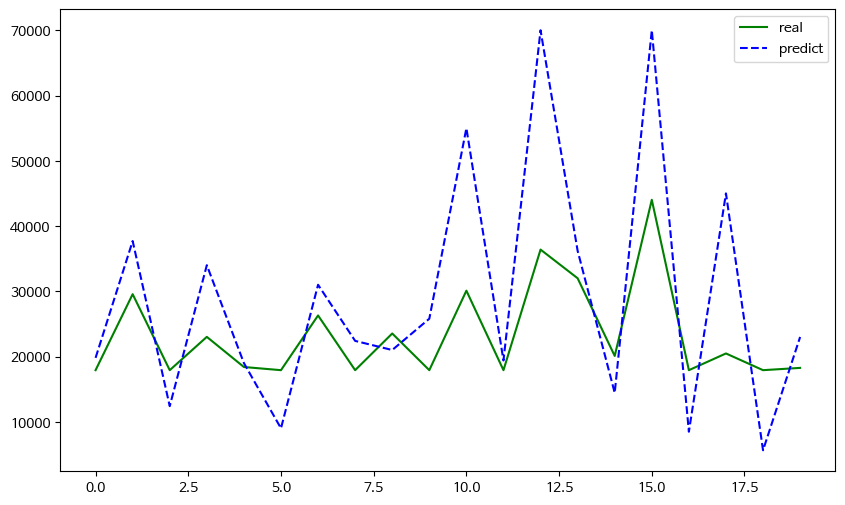

<Figure size 1000x600 with 0 Axes>

In [36]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(20), hat_s, '-',color = 'green', label='real')
plt.plot(np.arange(20), s, '--', color = 'blue', label='predict')
plt.legend()
plt.figure()

26952/26952 [==============================] - 45s 2ms/step


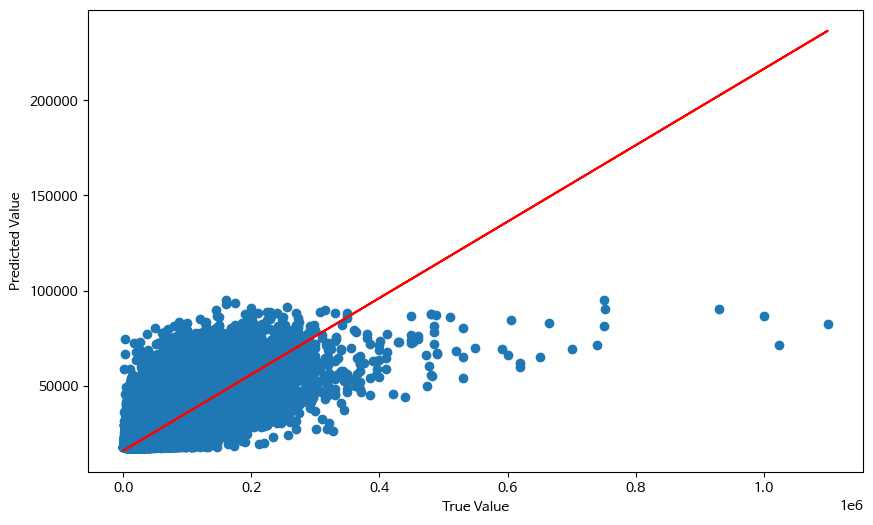

In [37]:
y_pred = model.predict(X_test).flatten()
p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test, y_pred)
plt.plot(y_test, f(y_test), color = "r", label="Ism")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()

In [38]:
model.save('/content/drive/MyDrive/Colab/houseprac2/model2')

Prefetch와 shuffle, lr포함


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
# Sequential 모델 생성
model = Sequential()

# 입력 레이어와 첫번째 히든 레이어 추가
model.add(Dense(64, activation='relu', input_shape=(16,)))
model.add(Dropout(0.5))

# 두번째 히든 레이어 추가
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
# model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# 데이터셋 shuffle과 prefetch 설정
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size).prefetch(1)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1088      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(train_dataset, epochs=10) #시간상 10번만 돌림

Epoch 1/10
20214/20214 [==============================] - 70s 3ms/step - loss: 331460224.0000 - mae: 11519.1816
Epoch 2/10
20214/20214 [==============================] - 65s 3ms/step - loss: 310427872.0000 - mae: 11054.4854
Epoch 3/10
20214/20214 [==============================] - 65s 3ms/step - loss: 301355744.0000 - mae: 10766.2998
Epoch 4/10
20214/20214 [==============================] - 80s 4ms/step - loss: 299487136.0000 - mae: 10771.8701
Epoch 5/10
20214/20214 [==============================] - 86s 4ms/step - loss: 298916224.0000 - mae: 10768.4023
Epoch 6/10
20214/20214 [==============================] - 81s 4ms/step - loss: 297131328.0000 - mae: 10733.8311
Epoch 7/10
20214/20214 [==============================] - 79s 4ms/step - loss: 296313248.0000 - mae: 10702.9092
Epoch 8/10
20214/20214 [==============================] - 80s 4ms/step - loss: 295492384.0000 - mae: 10695.6533
Epoch 9/10
20214/20214 [==============================] - 78s 4ms/step - loss: 299517632.0000 - mae: 107

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,epoch
5,297131328.0,10733.831055,5
6,296313248.0,10702.909180,6
7,295492384.0,10695.653320,7
8,299517632.0,10768.606445,8
9,299352736.0,10768.599609,9


In [17]:
Y_test_hat = model.predict(X_test).ravel().astype(int)

26952/26952 [==============================] - 45s 2ms/step


In [18]:
hat_s = Y_test_hat[1000:1020]
s = y_test[1000:1020]

<Figure size 1000x600 with 0 Axes>

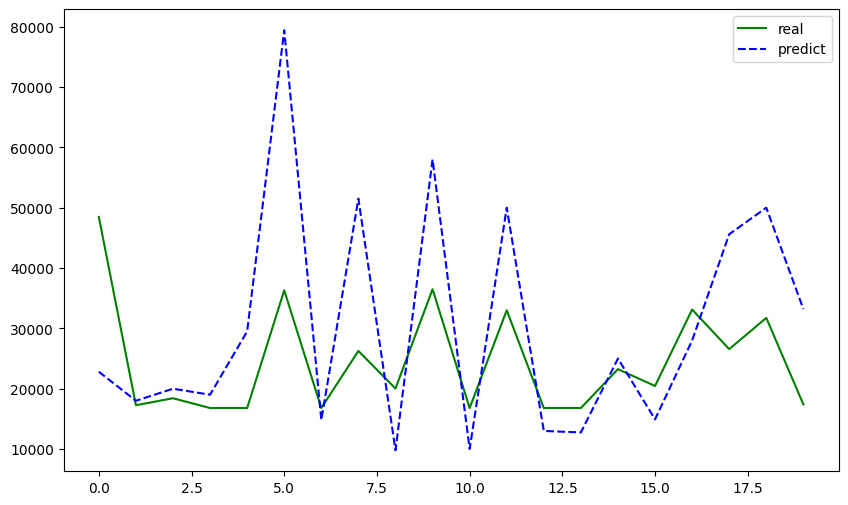

<Figure size 1000x600 with 0 Axes>

In [19]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(20), hat_s, '-',color = 'green', label='real')
plt.plot(np.arange(20), s, '--', color = 'blue', label='predict')
plt.legend()
plt.figure()

26952/26952 [==============================] - 48s 2ms/step


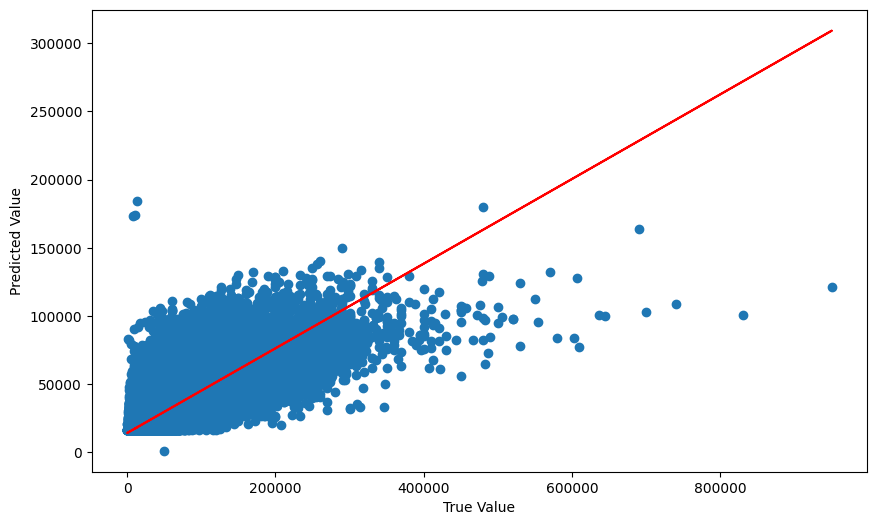

In [20]:
y_pred = model.predict(X_test).flatten()
p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test, y_pred)
plt.plot(y_test, f(y_test), color = "r", label="Ism")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()

In [22]:
model.save('/content/drive/MyDrive/Colab/houseprac2/model3')